In [8]:
import nibabel as nib
import mne

In [9]:
SUBJECT_DIR = "/home/carlos/Datasets/subjects/MNIAverage"
CEREBRA_DIR = "/home/carlos/Datasets/Cerebra/10.12751_g-node.be5e62"

(193, 229, 193)

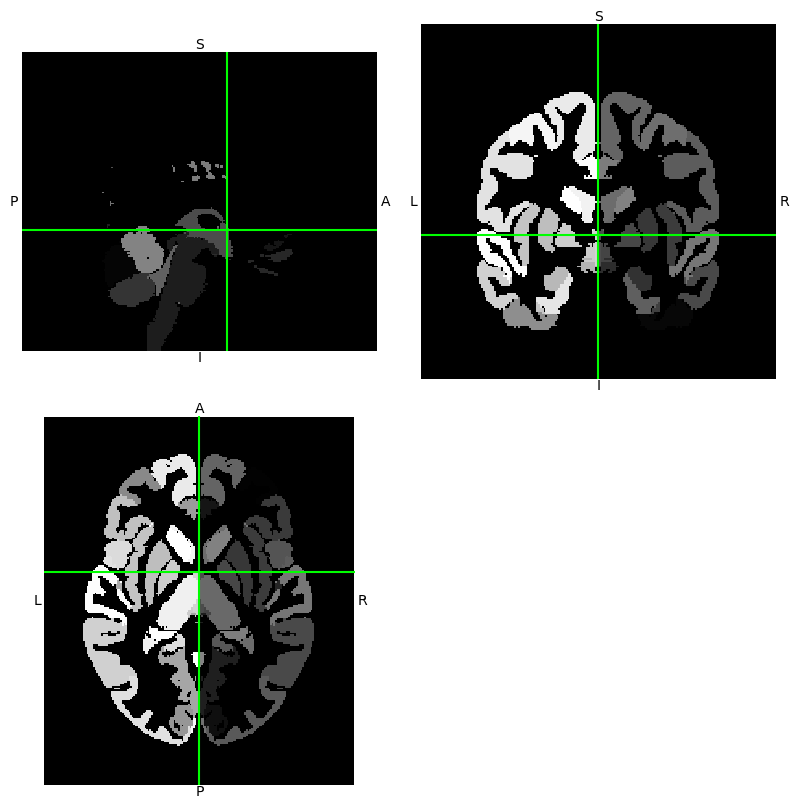

In [10]:
cerebra_img = nib.load(f"{CEREBRA_DIR}/CerebrA.nii")
cerebra_img_data = cerebra_img.get_fdata()
cerebra_img.orthoview()
cerebra_img_data.shape

In [11]:
nib.orientations.aff2axcodes(cerebra_img.affine)

('R', 'A', 'S')

In [12]:
cerebra_img.affine

array([[   1.,    0.,    0.,  -96.],
       [   0.,    1.,    0., -132.],
       [   0.,    0.,    1.,  -78.],
       [   0.,    0.,    0.,    1.]])

(256, 256, 256)

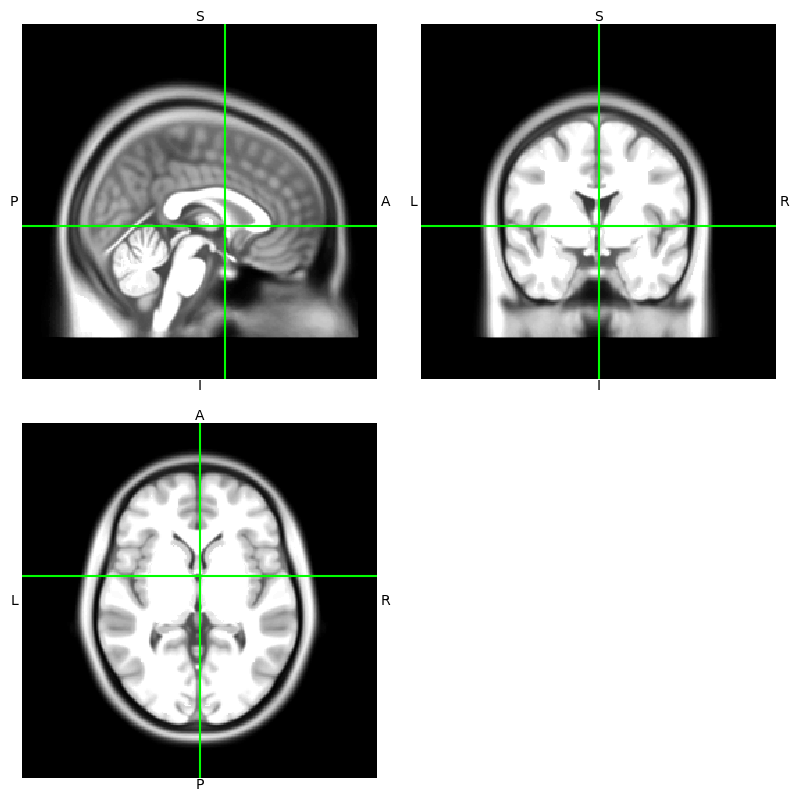

In [13]:
t1_img = nib.load(f"{SUBJECT_DIR}/mri/T1.mgz")
t1_data = t1_img.get_fdata()
t1_img.orthoview()
t1_img.shape

In [14]:
t1_img.affine

array([[  -1. ,    0. ,    0. ,  128.5],
       [   0. ,    0. ,    1. , -145.5],
       [   0. ,   -1. ,    0. ,  146.5],
       [   0. ,    0. ,    0. ,    1. ]])

In [15]:
nib.orientations.aff2axcodes(t1_img.affine)

('L', 'I', 'A')

### Transform .nii to .mgz

In [16]:
!mri_convert $CEREBRA_DIR"/CerebrA.nii" $CEREBRA_DIR"/CerebrA.mgz"

mri_convert /home/carlos/Datasets/Cerebra/10.12751_g-node.be5e62/CerebrA.nii /home/carlos/Datasets/Cerebra/10.12751_g-node.be5e62/CerebrA.mgz 
reading from /home/carlos/Datasets/Cerebra/10.12751_g-node.be5e62/CerebrA.nii...
TR=0.00, TE=0.00, TI=0.00, flip angle=0.00
i_ras = (1, 0, 0)
j_ras = (0, 1, 0)
k_ras = (0, 0, 1)
writing to /home/carlos/Datasets/Cerebra/10.12751_g-node.be5e62/CerebrA.mgz...


### Switch to head coordinate frame and store in CerebrA_in_head.mgz

In [17]:
!mri_vol2vol --mov $CEREBRA_DIR"/CerebrA.mgz" --o $CEREBRA_DIR"/CerebrA_in_head.mgz" --regheader --targ $SUBJECT_DIR/mri/T1.mgz --interp nearest

movvol /home/carlos/Datasets/Cerebra/10.12751_g-node.be5e62/CerebrA.mgz
targvol /home/carlos/Datasets/subjects/MNIAverage/mri/T1.mgz
outvol /home/carlos/Datasets/Cerebra/10.12751_g-node.be5e62/CerebrA_in_head.mgz
invert 0
tal    0
talres 2
regheader 1
noresample 0
interp  nearest (0)
precision  float (3)
Gdiag_no  -1
Synth      0
SynthSeed  1695155335

Computing registration based on scanner-to-scanner

Final tkRAS-to-tkRAS Matrix is:
-1.00000   0.00000   0.00000   0.00000;
 0.00000   0.00000   1.00000   0.00000;
 0.00000  -1.00000   0.00000   0.00000;
 0.00000   0.00000   0.00000   1.00000;


Vox2Vox Matrix is:
-1.00000   0.00000   0.00000   224.50000;
 0.00000   0.00000   1.00000  -13.50000;
 0.00000  -1.00000   0.00000   224.50000;
 0.00000   0.00000   0.00000   1.00000;

Resampling
Output registration matrix is identity

mri_vol2vol done


<OrthoSlicer3D: /home/carlos/Datasets/Cerebra/10.12751_g-node.be5e62/CerebrA.mgz (193, 229, 193)>

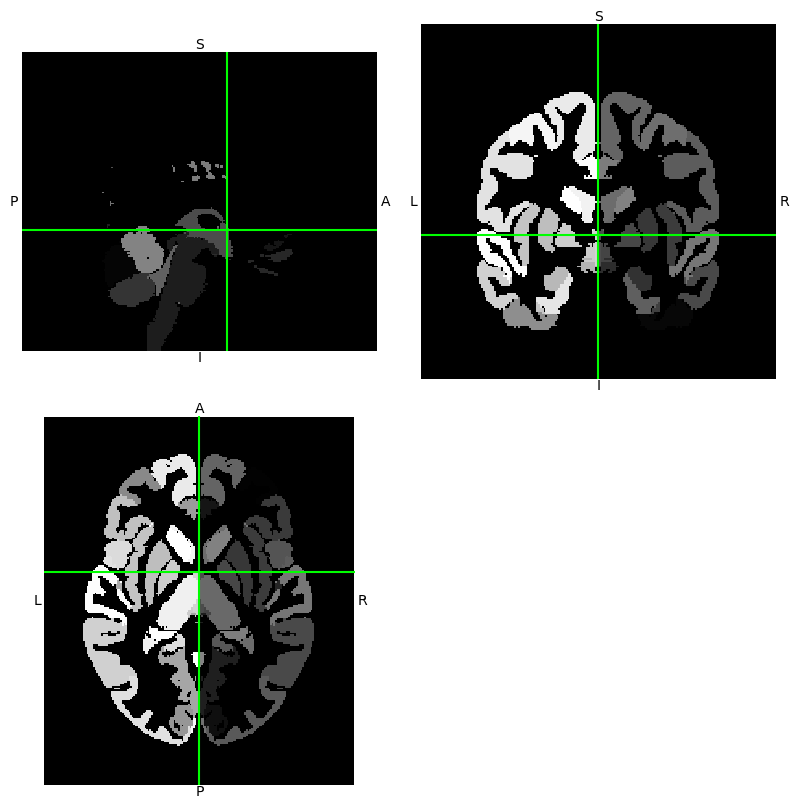

In [18]:
cerebra_img = nib.load(f"{CEREBRA_DIR}/CerebrA.mgz")
cerebra_img_data = cerebra_img.get_fdata()
cerebra_img.orthoview()

<OrthoSlicer3D: /home/carlos/Datasets/Cerebra/10.12751_g-node.be5e62/CerebrA_in_head.mgz (256, 256, 256)>

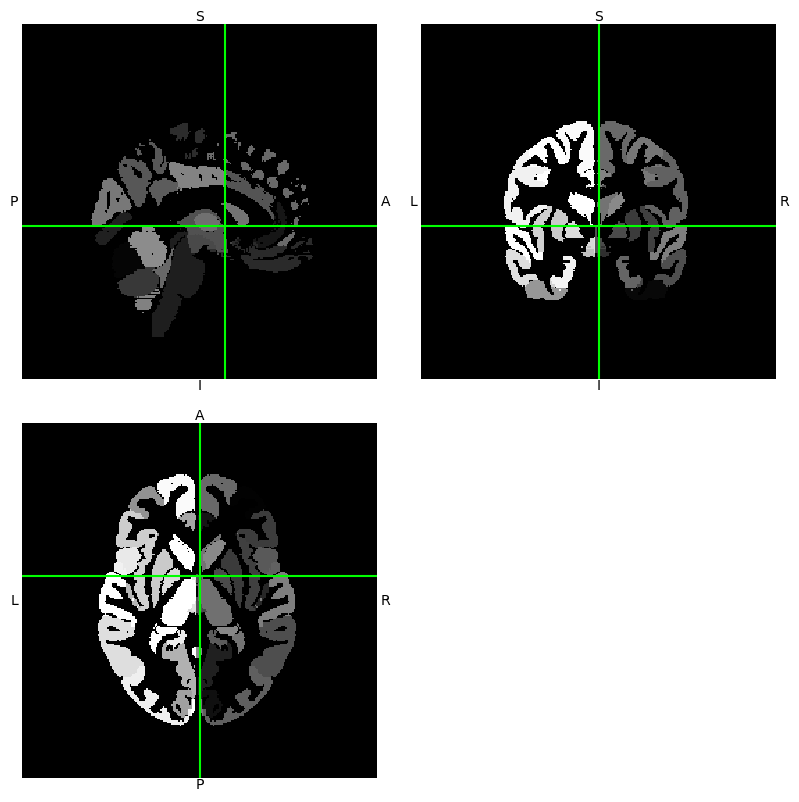

In [19]:
cerebra_img = nib.load(f"{CEREBRA_DIR}/CerebrA_in_head.mgz")
cerebra_img_data = cerebra_img.get_fdata()
cerebra_img.orthoview()

In [20]:
nib.orientations.aff2axcodes(cerebra_img.affine)

('L', 'I', 'A')

### Do the same with segmented whitematter 

(256, 256, 256)

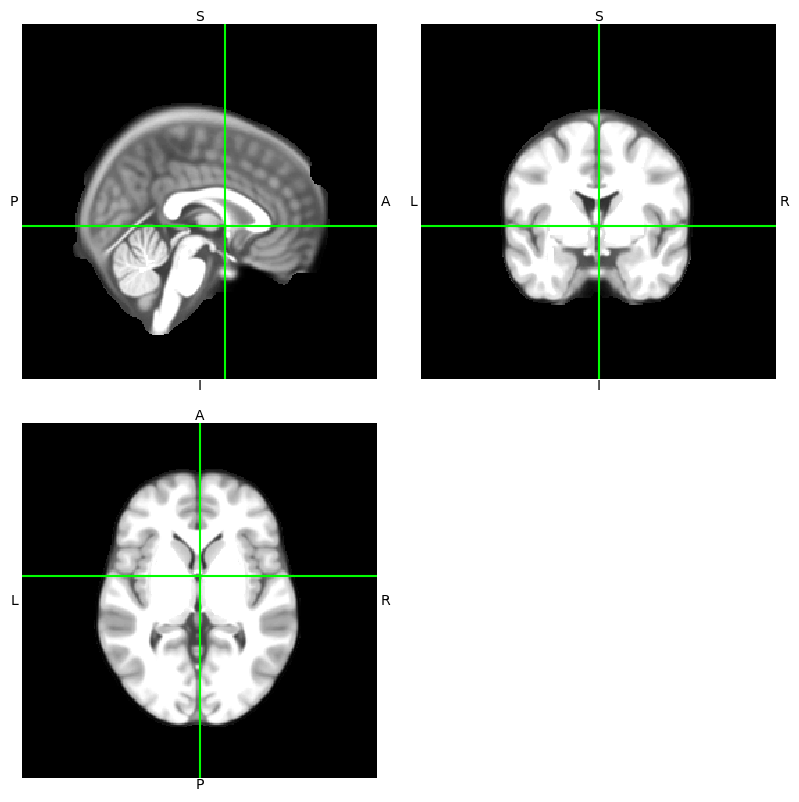

In [21]:
wm_img = nib.load(f"{SUBJECT_DIR}/mri/brain.mgz")
wm_data = t1_img.get_fdata()
wm_img.orthoview()
wm_data.shape

In [22]:
nib.orientations.aff2axcodes(wm_img.affine)

('L', 'I', 'A')

In [33]:
t1_img.header.get_ras2vox()

array([[ -1. ,  -0. ,  -0. , 128.5],
       [ -0. ,  -0. ,  -1. , 146.5],
       [  0. ,   1. ,   0. , 145.5],
       [  0. ,   0. ,   0. ,   1. ]], dtype=float32)

In [30]:
t1_img.header.get_vox2ras_tkr()

array([[  -1.,    0.,    0.,  128.],
       [   0.,    0.,    1., -128.],
       [   0.,   -1.,    0.,  128.],
       [   0.,    0.,    0.,    1.]], dtype=float32)

In [25]:
wm_img.affine

array([[  -1. ,    0. ,    0. ,  128.5],
       [   0. ,    0. ,    1. , -145.5],
       [   0. ,   -1. ,    0. ,  146.5],
       [   0. ,    0. ,    0. ,    1. ]])